In [2]:
!pip install prophet

In [3]:
!pip install plotly

1. Import Libraries and read dataset

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
data=pd.read_csv("signal_metrics.csv")

In [67]:
data.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


In [68]:
data.isnull().sum()

Timestamp                       0
Locality                        0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type                    0
BB60C Measurement (dBm)         0
srsRAN Measurement (dBm)        0
BladeRFxA9 Measurement (dBm)    0
dtype: int64

2. Data Preprocessing


In [69]:
signal_data=data.rename(columns={'Timestamp':'ds',
                         'Signal Strength (dBm)':'y'
                          })

In [70]:
signal_data

,ds,Locality,Latitude,Longitude,y,Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467
...,...,...,...,...,...,...,...,...,...,...,...,...
16824,2023-06-10 23:44:23.950552,Pataliputra,25.542846,85.129611,-92.024221,0.0,3.720856,53.376474,4G,-90.177947,-97.971619,-93.362041
16825,2023-06-10 23:47:31.160725,Boring Canal Road,25.724624,85.233365,-87.579509,0.0,2.117080,134.458401,LTE,-87.694985,-92.616868,-84.749607
16826,2023-06-10 23:50:38.370898,Boring Road,25.574020,85.030036,-90.451396,0.0,72.870842,32.556578,5G,-91.098875,-97.447725,-87.752628
16827,2023-06-10 23:53:45.581071,Boring Road,25.619325,85.183155,-85.661814,0.0,2.482843,144.007572,3G,0.000000,0.000000,0.000000


In [71]:
signal_data['ds']=pd.to_datetime(signal_data['ds'])

In [72]:
signal_data2=signal_data[['ds','y']]

3. Decomposition time Series

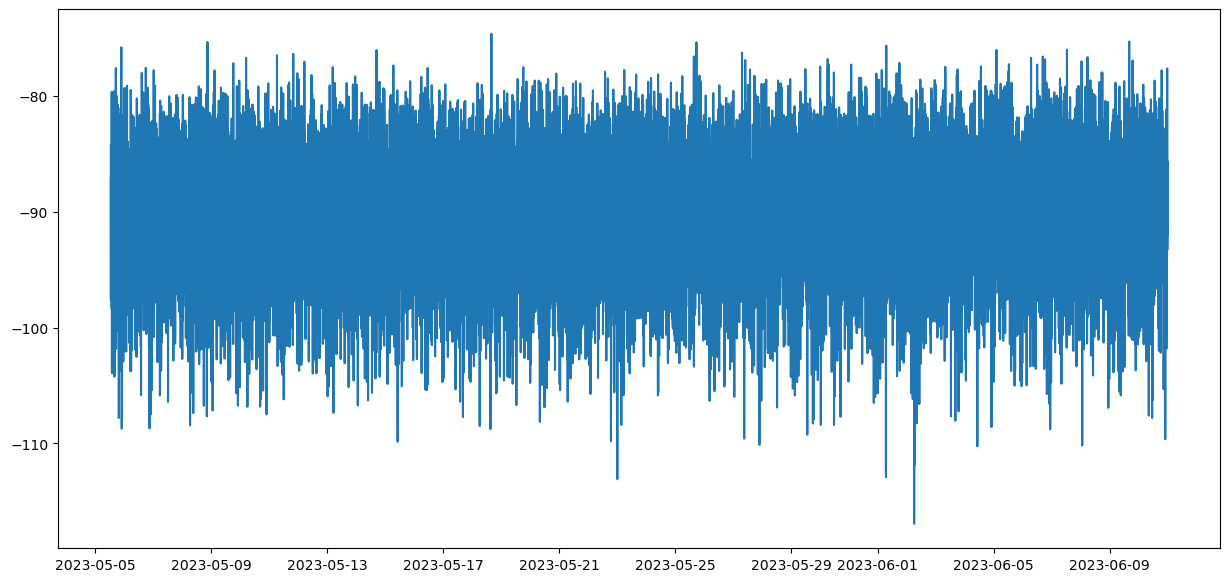

In [73]:
plt.figure(figsize=(15,7))
plt.plot(signal_data2['ds'],signal_data2['y'])
plt.show()

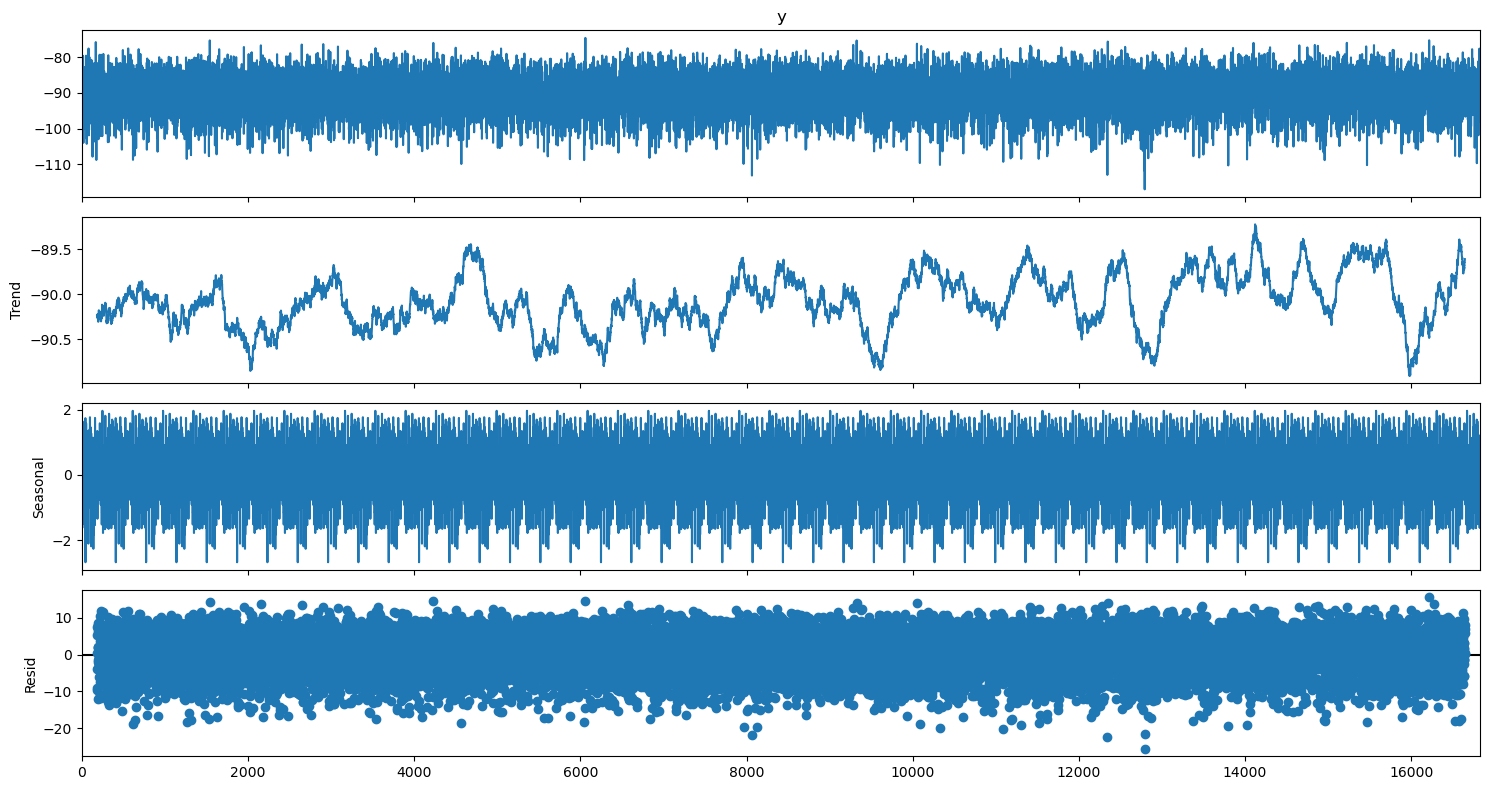

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams.update({'figure.figsize':(15,8)})
decomposition = seasonal_decompose(signal_data2['y'], model='additive', period=365)  # assuming daily seasonality
decomposition.plot()
plt.tight_layout()
plt.show()

4. Intialize and fit prophet model

In [20]:
from prophet import Prophet


In [21]:
model=Prophet()
model.fit(signal_data2)

14:04:38 - cmdstanpy - INFO - Chain [1] start processing
14:04:41 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
days_forecast=model.make_future_dataframe(periods=365)

In [37]:
days_forecast

,ds
0,2023-05-05 12:50:40.000000
1,2023-05-05 12:53:47.210173
2,2023-05-05 12:56:54.420346
3,2023-05-05 13:00:01.630519
4,2023-05-05 13:03:08.840692
...,...
17189,2024-06-05 23:56:52.791244
17190,2024-06-06 23:56:52.791244
17191,2024-06-07 23:56:52.791244
17192,2024-06-08 23:56:52.791244


In [38]:
y_predictions=model.predict(days_forecast)

In [39]:
y_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-05 12:50:40.000000,-90.106355,-97.080199,-83.712713,-90.106355,-90.106355,-0.282437,-0.282437,-0.282437,0.048441,0.048441,0.048441,-0.330879,-0.330879,-0.330879,0.0,0.0,0.0,-90.388793
1,2023-05-05 12:53:47.210173,-90.106497,-96.715016,-83.608983,-90.106497,-90.106497,-0.284856,-0.284856,-0.284856,0.045713,0.045713,0.045713,-0.330569,-0.330569,-0.330569,0.0,0.0,0.0,-90.391353
2,2023-05-05 12:56:54.420346,-90.106639,-97.449235,-83.409662,-90.106639,-90.106639,-0.287235,-0.287235,-0.287235,0.043018,0.043018,0.043018,-0.330252,-0.330252,-0.330252,0.0,0.0,0.0,-90.393873
3,2023-05-05 13:00:01.630519,-90.106780,-97.645989,-83.750133,-90.106780,-90.106780,-0.289568,-0.289568,-0.289568,0.040361,0.040361,0.040361,-0.329929,-0.329929,-0.329929,0.0,0.0,0.0,-90.396348
4,2023-05-05 13:03:08.840692,-90.106922,-96.728179,-83.278502,-90.106922,-90.106922,-0.291850,-0.291850,-0.291850,0.037747,0.037747,0.037747,-0.329598,-0.329598,-0.329598,0.0,0.0,0.0,-90.398772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17189,2024-06-05 23:56:52.791244,-84.526145,-106.412306,-64.937878,-105.200402,-65.103244,-0.062233,-0.062233,-0.062233,-0.126831,-0.126831,-0.126831,0.064598,0.064598,0.064598,0.0,0.0,0.0,-84.588378
17190,2024-06-06 23:56:52.791244,-84.511460,-106.911775,-63.630846,-105.211213,-64.966799,-0.331417,-0.331417,-0.331417,-0.126831,-0.126831,-0.126831,-0.204586,-0.204586,-0.204586,0.0,0.0,0.0,-84.842877
17191,2024-06-07 23:56:52.791244,-84.496775,-105.792170,-63.612973,-105.221506,-64.839526,-0.254098,-0.254098,-0.254098,-0.126831,-0.126831,-0.126831,-0.127266,-0.127266,-0.127266,0.0,0.0,0.0,-84.750872
17192,2024-06-08 23:56:52.791244,-84.482090,-105.467014,-64.273800,-105.281619,-64.715826,0.064916,0.064916,0.064916,-0.126831,-0.126831,-0.126831,0.191747,0.191747,0.191747,0.0,0.0,0.0,-84.417174


5. Visualize Prophet Model Forecast

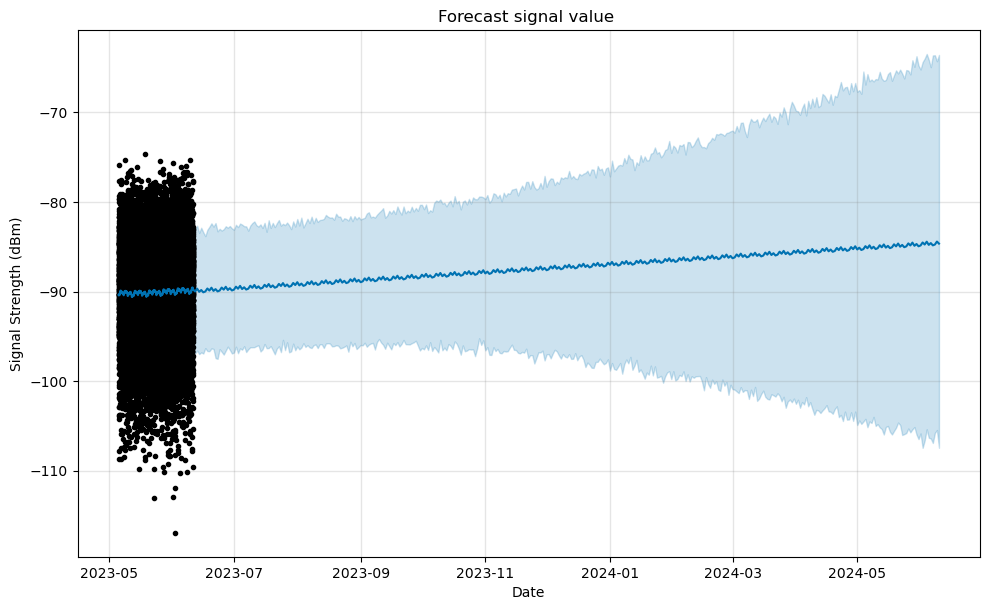

In [40]:
model.plot(y_predictions)
plt.title("Forecast signal value ")
plt.xlabel('Date')
plt.ylabel('Signal Strength (dBm)')
plt.show()

6. Plot forecast components (Trend Weekly and Daily Seasonality)

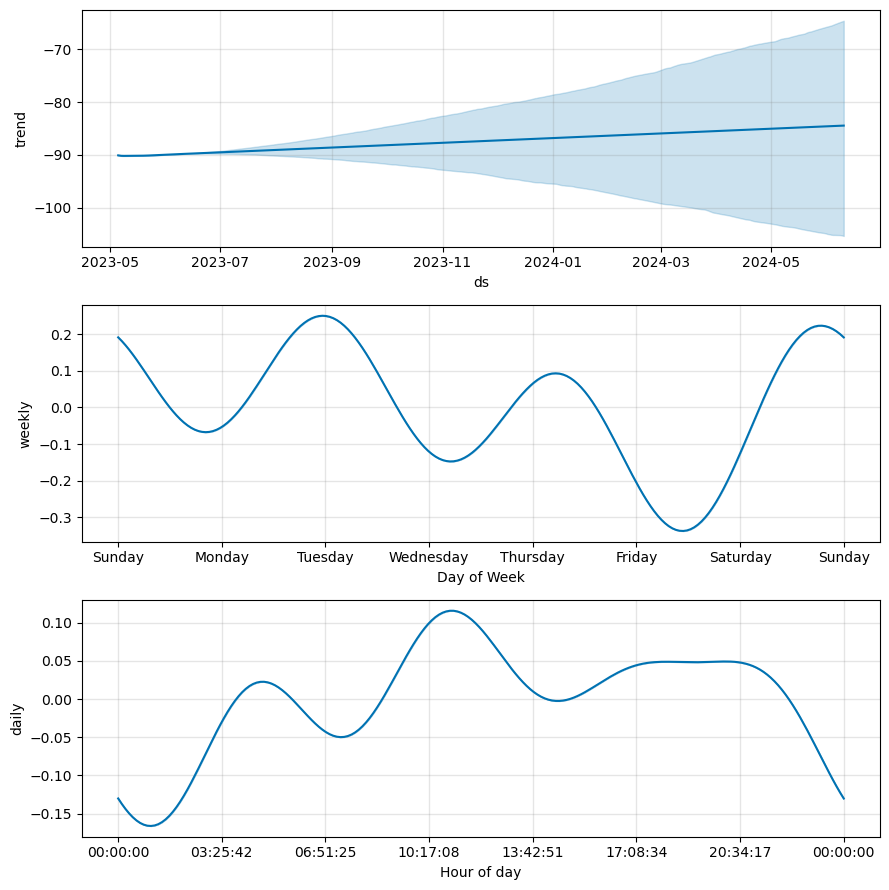

In [42]:
model.plot_components(y_predictions)
plt.show()

In [45]:
forecast_df=y_predictions[['ds','yhat','yhat_lower','yhat_upper']]
result=pd.merge(signal_data2,forecast_df,on='ds',how='inner')
result

,ds,y,yhat,yhat_lower,yhat_upper
0,2023-05-05 12:50:40.000000,-84.274113,-90.388793,-97.080199,-83.712713
1,2023-05-05 12:53:47.210173,-97.653121,-90.391353,-96.715016,-83.608983
2,2023-05-05 12:56:54.420346,-87.046134,-90.393873,-97.449235,-83.409662
3,2023-05-05 13:00:01.630519,-94.143159,-90.396348,-97.645989,-83.750133
4,2023-05-05 13:03:08.840692,-94.564765,-90.398772,-96.728179,-83.278502
...,...,...,...,...,...
16824,2023-06-10 23:44:23.950552,-92.024221,-89.746296,-96.965695,-82.853780
16825,2023-06-10 23:47:31.160725,-87.579509,-89.750494,-96.541059,-82.725685
16826,2023-06-10 23:50:38.370898,-90.451396,-89.754594,-97.186890,-82.879679
16827,2023-06-10 23:53:45.581071,-85.661814,-89.758612,-97.071886,-82.935879


7. Time Series metric

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#RMSE
np.sqrt(mean_squared_error(result['y'],result['yhat']))

np.float64(5.395047931080908)

In [49]:
#MAE
mean_absolute_error(result['y'],result['yhat'])

4.339088056022846

8. Prophet with External Regressors

<Axes: >

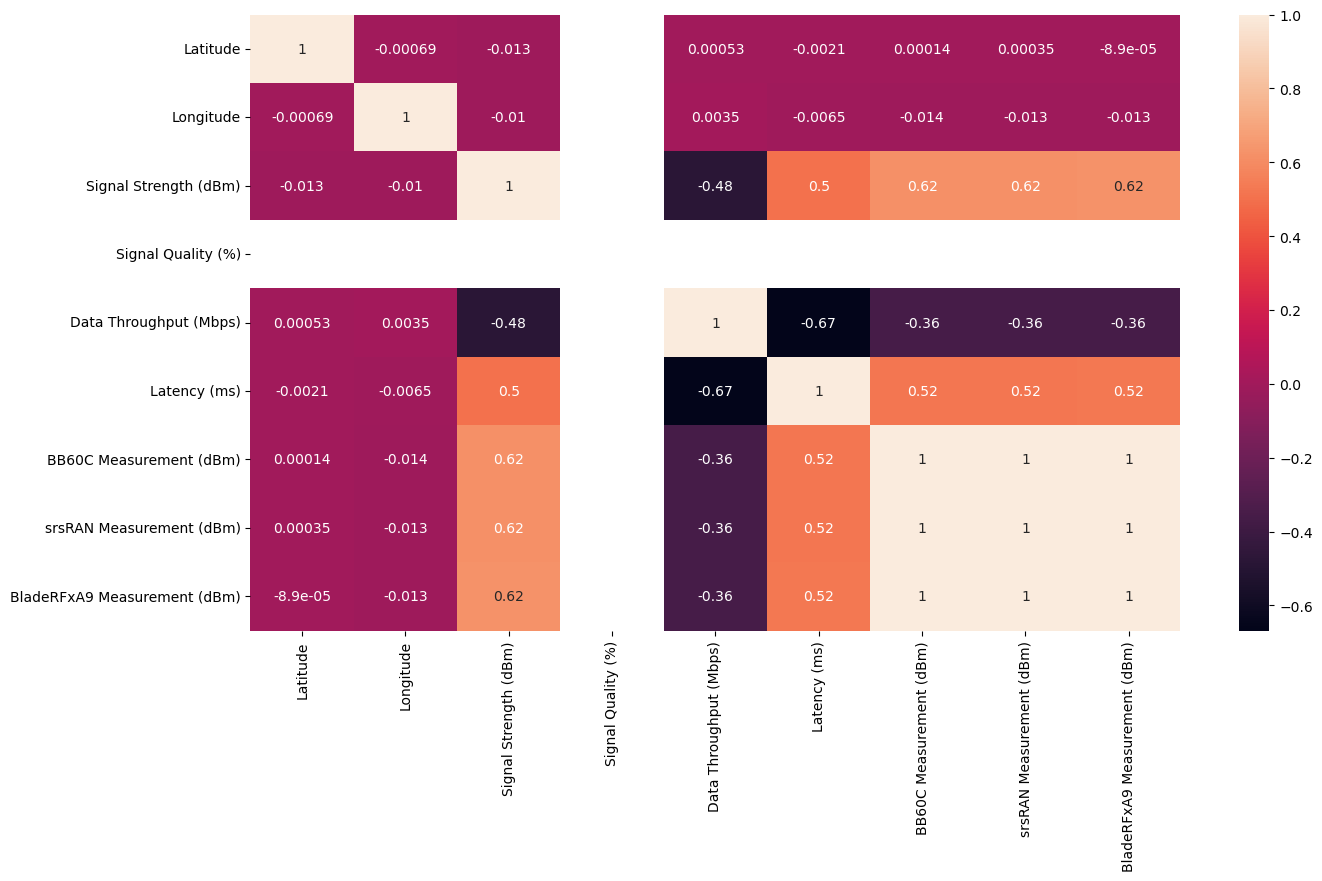

In [50]:
sns.heatmap((data.corr(numeric_only=True)),annot=True)

In [53]:
signal_data.columns

Index(['ds', 'Locality', 'Latitude', 'Longitude', 'y', 'Signal Quality (%)',
       'Data Throughput (Mbps)', 'Latency (ms)', 'Network Type',
       'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)',
       'BladeRFxA9 Measurement (dBm)'],
      dtype='object')

In [54]:
signal_data3=signal_data[['ds','y','Latency (ms)','BB60C Measurement (dBm)','srsRAN Measurement (dBm)','BladeRFxA9 Measurement (dBm)']]
train=signal_data3.iloc[:13464,:]
test=signal_data3.iloc[13464:,:]

In [58]:
from prophet import Prophet

#Initialise the model
model=Prophet()
model.add_regressor('Latency (ms)')
model.add_regressor('BB60C Measurement (dBm)')
model.fit(train)

15:02:08 - cmdstanpy - INFO - Chain [1] start processing
15:02:08 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
y_predictions=model.predict(test)

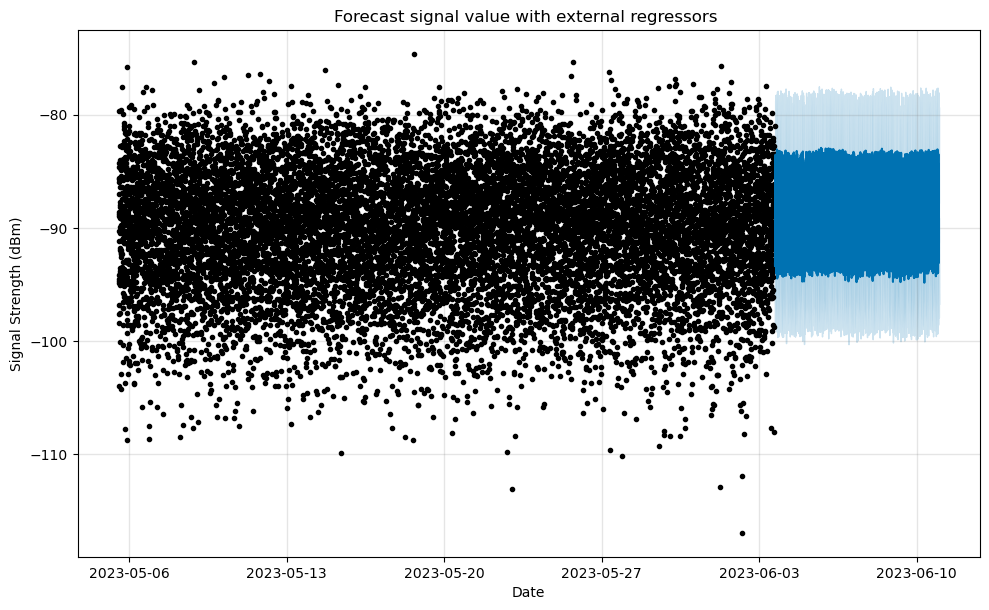

In [61]:
model.plot(y_predictions)
plt.title("Forecast signal value with external regressors ")
plt.xlabel('Date')
plt.ylabel('Signal Strength (dBm)')
plt.show()

In [84]:
np.sqrt(mean_squared_error(test['y'],y_predictions['yhat']))

np.float64(4.148364536105193)

In [89]:
from prophet import Prophet

#Initialise the model
model=Prophet()
model.add_regressor('Latency (ms)')
model.add_regressor('BB60C Measurement (dBm)')
model.add_regressor('srsRAN Measurement (dBm)')
model.add_regressor('BladeRFxA9 Measurement (dBm)')
model.fit(train)

15:26:28 - cmdstanpy - INFO - Chain [1] start processing
15:26:29 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
y_predictions=model.predict(test)

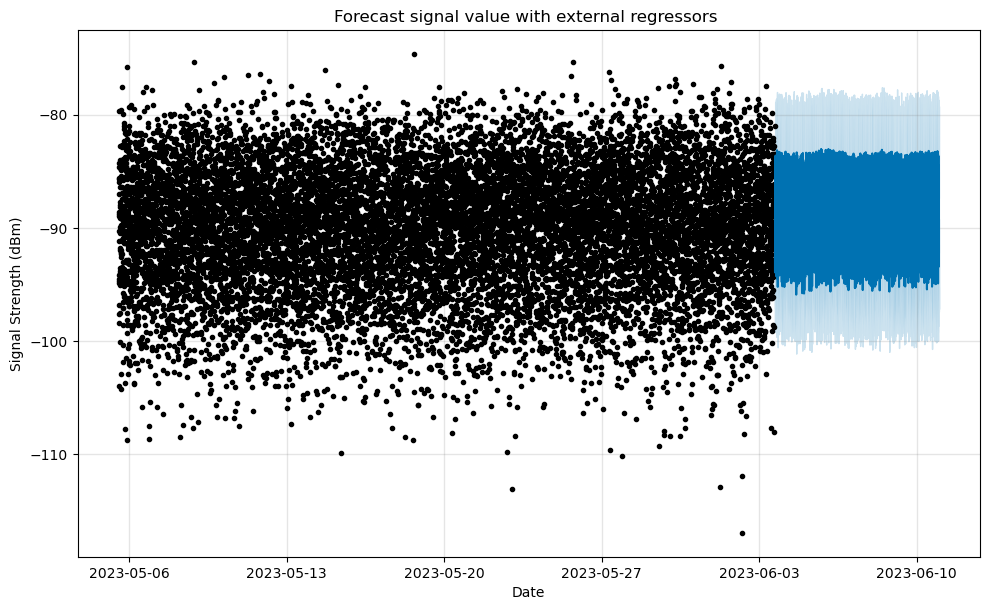

In [91]:
model.plot(y_predictions)
plt.title("Forecast signal value with external regressors ")
plt.xlabel('Date')
plt.ylabel('Signal Strength (dBm)')
plt.show()

In [92]:
np.sqrt(mean_squared_error(test['y'],y_predictions['yhat']))

np.float64(3.9966443850141715)